# **Part 1 - Identifying Users at Risk of Churn**

### **Data Ingestion**

In [0]:
# Creating a Spark Dataframe using the Source Dataset
churn_df = (spark.read
                .format("csv")
                .option("header", "true")
                .option("inferSchema", "true")
                .load("dbfs:/FileStore/project/Churn_Modelling.csv"))
display(churn_df)

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Creating SQL View from the Source Dataset

DROP VIEW IF EXISTS churn;

CREATE TEMPORARY VIEW churn
USING csv
OPTIONS (
  path "dbfs:/FileStore/project/Churn_Modelling.csv",
  header "true",
  inferSchema "true"
);

SELECT * FROM churn LIMIT 10;

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

### **Checking for NULLs**

In [0]:
%sql
SELECT
    SUM(CASE WHEN CustomerId IS NULL THEN 1 ELSE 0 END) AS CustomerId_NULLs,
    SUM(CASE WHEN Surname IS NULL THEN 1 ELSE 0 END) AS Surname_NULLs,
    SUM(CASE WHEN CreditScore IS NULL THEN 1 ELSE 0 END) AS CreditScore_NULLs,
    SUM(CASE WHEN Geography IS NULL THEN 1 ELSE 0 END) AS Geography_NULLs,
    SUM(CASE WHEN Gender IS NULL THEN 1 ELSE 0 END) AS Gender_NULLs,
    SUM(CASE WHEN Age IS NULL THEN 1 ELSE 0 END) AS Age_NULLs,
    SUM(CASE WHEN Tenure IS NULL THEN 1 ELSE 0 END) AS Tenure_NULLs,
    SUM(CASE WHEN Balance IS NULL THEN 1 ELSE 0 END) AS Balance_NULLs,
    SUM(CASE WHEN NumOfProducts IS NULL THEN 1 ELSE 0 END) AS NumOfProducts_NULLs,
    SUM(CASE WHEN HasCrCard IS NULL THEN 1 ELSE 0 END) AS HasCrCard_NULLs,
    SUM(CASE WHEN IsActiveMember IS NULL THEN 1 ELSE 0 END) AS IsActiveMember_NULLs,
    SUM(CASE WHEN EstimatedSalary IS NULL THEN 1 ELSE 0 END) AS EstimatedSalary_NULLs,
    SUM(CASE WHEN Exited IS NULL THEN 1 ELSE 0 END) AS Exited_NULLs
FROM
    churn

-- No NULL Values present in the Dataset

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
WITH duplicate_counts AS (
    SELECT 
      COUNT(*) AS total_count,
      COUNT(DISTINCT *) AS distinct_count
    FROM churn
)
SELECT 
  total_count,
  distinct_count,
  total_count - distinct_count AS duplicate_count
FROM duplicate_counts

-- No Exact Duplicates in the Dataset

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  (
    CASE
      WHEN
        CreditScore <= 400
        THEN ' <400'
      WHEN
        CreditScore > 400
        AND CreditScore <= 450
        THEN '401 - 450'
      WHEN
        CreditScore > 450
        AND CreditScore <= 500
        THEN '451 - 500'
      WHEN
        CreditScore > 500
        AND CreditScore <= 550
        THEN '501 - 550'
      WHEN
        CreditScore > 550
        AND CreditScore <= 600
        THEN '551 - 600'
      WHEN
        CreditScore > 600
        AND CreditScore <= 650
        THEN '601 - 650'
      WHEN
        CreditScore > 650
        AND CreditScore <= 700
        THEN '651 - 700'
      WHEN
        CreditScore > 700
        AND CreditScore <= 750
        THEN '701 - 750'
      ELSE '750+'
    END
  ) AS bracket
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  bracket

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
-- Checking Credit Score for People who Churned

SELECT
  (
    CASE
      WHEN
        CreditScore <= 400
        THEN ' <400'
      WHEN
        CreditScore > 400
        AND CreditScore <= 450
        THEN '401 - 450'
      WHEN
        CreditScore > 450
        AND CreditScore <= 500
        THEN '451 - 500'
      WHEN
        CreditScore > 500
        AND CreditScore <= 550
        THEN '501 - 550'
      WHEN
        CreditScore > 550
        AND CreditScore <= 600
        THEN '551 - 600'
      WHEN
        CreditScore > 600
        AND CreditScore <= 650
        THEN '601 - 650'
      WHEN
        CreditScore > 650
        AND CreditScore <= 700
        THEN '651 - 700'
      WHEN
        CreditScore > 700
        AND CreditScore <= 750
        THEN '701 - 750'
      ELSE '750+'
    END
  ) AS bracket
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  1
ORDER BY
  bracket

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  `Geography` AS country_name
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  country_name

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking Country for Churned Users Only

SELECT
  `Geography` AS country_name
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE 
  exited = 1
GROUP BY
  1
ORDER BY
  country_name

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  Gender
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  Gender

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking Gender Distribution for Churned Customers Only

SELECT
  Gender
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  1
ORDER BY
  Gender

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  (
    CASE
      WHEN
        Age < 25
        THEN ' < 25'
      WHEN
        Age >= 25 
        AND Age < 30
        THEN '25 - 30'
      WHEN
        Age >= 30 
        AND Age < 35
        THEN '30 - 35'
      WHEN
        Age >= 35 
        AND Age < 40
        THEN '35 - 40'
      WHEN
        Age >= 40 
        AND Age < 45
        THEN '40 - 45'
      WHEN
        Age >= 45
        AND Age < 55
        THEN '45 - 55'
      ELSE
        '55 +'
    END
  ) AS age_group
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  age_group

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking for Chunred Users Only

SELECT
  (
    CASE
      WHEN
        Age < 25
        THEN ' < 25'
      WHEN
        Age >= 25 
        AND Age < 30
        THEN '25 - 30'
      WHEN
        Age >= 30 
        AND Age < 35
        THEN '30 - 35'
      WHEN
        Age >= 35 
        AND Age < 40
        THEN '35 - 40'
      WHEN
        Age >= 40 
        AND Age < 45
        THEN '40 - 45'
      WHEN
        Age >= 45
        AND Age < 55
        THEN '45 - 55'
      ELSE
        '55 +'
    END
  ) AS age_group
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  1
ORDER BY
  age_group

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  Tenure
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  Tenure

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking for Churned Customer Only

SELECT
  Tenure
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  1
ORDER BY
  Tenure

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  NumOfProducts
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  NumOfProducts

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking for Churned Customers Only
SELECT
  NumOfProducts
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  1
ORDER BY
  NumOfProducts

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  HasCrCard
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  1
ORDER BY
  HasCrCard

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking for Churned Customers Only
SELECT
  HasCrCard
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  1
ORDER BY
  HasCrCard

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql
SELECT
  IsActiveMember
  , COUNT(CustomerId) AS cnt
FROM
  churn
GROUP BY
  IsActiveMember

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
%sql

-- Checking for Churned Customers Only
SELECT
  IsActiveMember
  , COUNT(CustomerId) AS cnt
FROM
  churn
WHERE
  exited = 1
GROUP BY
  IsActiveMember

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

# **Part 2 - Churn Modelling**

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, countDistinct
from pyspark.sql.types import StringType, IntegerType, DoubleType

from contextlib import suppress

with suppress(Exception):
    # 1. Create SparkSession
    spark = SparkSession.builder.appName("ChurnPrediction").getOrCreate()

    # 2. Load data (assuming churn_df is already defined)
    data = churn_df

    # 3. Identify String and Numerical Columns
    categorical_cols = [field.name for field in data.schema.fields if isinstance(field.dataType, StringType)]
    numerical_cols = [field.name for field in data.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType)) and field.name != 'Exited']

    # 4. Identify High Cardinality Categorical Features
    cardinality_threshold = 32
    high_cardinality_cols = [col_name for col_name in categorical_cols 
                            if data.select(countDistinct(col(col_name))).collect()[0][0] > cardinality_threshold]

    # 5. Columns to Exclude from Feature Transformation
    cols_to_exclude = ['RowNumber'] + high_cardinality_cols
    categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude]
    numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

    # 6. Feature Engineering and Transformation
    indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep") for column in categorical_cols]

    indexed_cols = [c + "_index" for c in categorical_cols]
    assembler_inputs = numerical_cols + indexed_cols
    assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

    # 7. Define the Decision Tree Model
    dt = DecisionTreeClassifier(labelCol="Exited", featuresCol="features", maxDepth=5)

    # 8. Create the Pipeline
    pipeline = Pipeline(stages=indexers + [assembler, dt])

    # 9. Split Data into Training and Testing Sets
    (trainingData, testData) = data.randomSplit([0.8, 0.2], seed=42)

    # 10. Train the Model
    model = pipeline.fit(trainingData)

    # 11. Make Predictions
    predictions = model.transform(testData)

    # 12. Evaluate the Model
    evaluator = BinaryClassificationEvaluator(labelCol="Exited")
    auc = evaluator.evaluate(predictions)

    print(f"Area Under ROC Curve: {auc}")

    # (Optional) Feature Importance
    dtModel = model.stages[-1]
    importances = dtModel.featureImportances

    feature_importances = list(zip(assembler_inputs, importances))
    feature_importances.sort(key=lambda x: x[1], reverse=True)

    print("\nFeature Importances:")
    for feature, importance in feature_importances:
        print(f"{feature}: {importance}")

    # Stop Spark session
    spark.stop()


Area Under ROC Curve: 0.5820302241547243

Feature Importances:
Age: 0.43395953100406365
NumOfProducts: 0.34978094225748235
IsActiveMember: 0.13978523478566757
Geography_index: 0.041435636484878934
Balance: 0.019269028299761733
EstimatedSalary: 0.01097946759929191
Tenure: 0.0025405416354353887
Gender_index: 0.002249617933418404
CustomerId: 0.0
CreditScore: 0.0
HasCrCard: 0.0
Error in callback <bound method AdviceGenerator.post_command_execute of <dbruntime.AdviceGenerator.AdviceGenerator object at 0x7fb1c07bf160>> (for post_execute):


java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, countDistinct
from pyspark.sql.types import StringType, IntegerType, DoubleType

from contextlib import suppress

with suppress(Exception):
    # 1. Create SparkSession
    spark = SparkSession.builder.appName("ChurnPrediction").getOrCreate()

    # 2. Load data (assuming churn_df is already defined)
    data = churn_df

    # 3. Identify String and Numerical Columns
    categorical_cols = [field.name for field in data.schema.fields if isinstance(field.dataType, StringType)]
    numerical_cols = [field.name for field in data.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType)) and field.name != 'Exited']

    # 4. Identify High Cardinality Categorical Features
    cardinality_threshold = 32
    high_cardinality_cols = [col_name for col_name in categorical_cols 
                            if data.select(countDistinct(col(col_name))).collect()[0][0] > cardinality_threshold]

    # 5. Columns to Exclude from Feature Transformation
    cols_to_exclude = ['RowNumber'] + high_cardinality_cols
    categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude]
    numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

    # 6. Feature Engineering and Transformation
    indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep") for column in categorical_cols]

    indexed_cols = [c + "_index" for c in categorical_cols]
    assembler_inputs = numerical_cols + indexed_cols
    assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

    # 7. Define the Gradient Boosted Trees Model
    gbt = GBTClassifier(labelCol="Exited", featuresCol="features", maxIter=10)

    # 8. Create the Pipeline
    pipeline = Pipeline(stages=indexers + [assembler, gbt])

    # 9. Split Data into Training and Testing Sets
    (trainingData, testData) = data.randomSplit([0.8, 0.2], seed=42)

    # 10. Train the Model
    model = pipeline.fit(trainingData)

    # 11. Make Predictions
    predictions = model.transform(testData)

    # 12. Evaluate the Model
    evaluator = BinaryClassificationEvaluator(labelCol="Exited")
    auc = evaluator.evaluate(predictions)

    print(f"Area Under ROC Curve: {auc}")

    # (Optional) Feature Importance
    gbtModel = model.stages[-1]
    importances = gbtModel.featureImportances

    feature_importances = list(zip(assembler_inputs, importances))
    feature_importances.sort(key=lambda x: x[1], reverse=True)

    print("\nFeature Importances:")
    for feature, importance in feature_importances:
        print(f"{feature}: {importance}")

    # Stop Spark session
    spark.stop()


java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, countDistinct
from pyspark.sql.types import StringType, IntegerType, DoubleType

from contextlib import suppress

with suppress(Exception):
    # 1. Create SparkSession (missing in the original code)
    spark = SparkSession.builder.appName("ChurnPrediction").getOrCreate()

    # 2. Load data (assuming churn_df is already defined)
    data = churn_df

    # 3. Identify String and Numerical Columns
    categorical_cols = [field.name for field in data.schema.fields if isinstance(field.dataType, StringType)]
    numerical_cols = [field.name for field in data.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType)) and field.name != 'Exited']

    # 4. Identify High Cardinality Categorical Features
    cardinality_threshold = 32
    high_cardinality_cols = [col_name for col_name in categorical_cols 
                            if data.select(countDistinct(col(col_name))).collect()[0][0] > cardinality_threshold]


    # 5. Columns to Exclude from Feature Transformation
    cols_to_exclude = ['RowNumber'] + high_cardinality_cols
    categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude]
    numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

    # 6. Feature Engineering and Transformation
    indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep") for column in categorical_cols]

    indexed_cols = [c + "_index" for c in categorical_cols]
    assembler_inputs = numerical_cols + indexed_cols
    assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

    # 7. Define the Random Forest Model
    rf = RandomForestClassifier(labelCol="Exited", featuresCol="features", numTrees=100)

    # 8. Create the Pipeline
    pipeline = Pipeline(stages=indexers + [assembler, rf])

    # 9. Split Data into Training and Testing Sets
    (trainingData, testData) = data.randomSplit([0.8, 0.2], seed=42)

    # 10. Train the Model
    model = pipeline.fit(trainingData)

    # 11. Make Predictions
    predictions = model.transform(testData)

    # 12. Evaluate the Model
    evaluator = BinaryClassificationEvaluator(labelCol="Exited")
    auc = evaluator.evaluate(predictions)

    print(f"Area Under ROC Curve: {auc}")

    # (Optional) Feature Importance
    rfModel = model.stages[-1]
    importances = rfModel.featureImportances

    feature_importances = list(zip(assembler_inputs, importances))
    feature_importances.sort(key=lambda x: x[1], reverse=True)

    print("\nFeature Importances:")
    for feature, importance in feature_importances:
        print(f"{feature}: {importance}")

    # Stop Spark session
    spark.stop()

java.lang.Exception: Could not stop computations
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:777)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$2(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:293)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:289)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:47)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:44)
	at com.databricks.threading.ContextBoundRunnable.withAttributionContext(ContextBoundRunnable.scala:6)
	at com.databricks.threading.ContextBoundRunnable.$anonfun$run$1(ContextBoundRunnable.scala:15)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:73)
	at com.databricks.threading.ContextBoundRunnable.run(ContextBoundRunnable.scala:14)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:476)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:842)

# **Part 3 - Identifying High Value Churn**

In [0]:
# Creating a Spark Dataframe using the Source Dataset
cluster_df = (spark.read
                .format("csv")
                .option("header", "true")
                .option("inferSchema", "true")
                .load("dbfs:/FileStore/project/Mall_Customers.csv"))
display(cluster_df)

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72


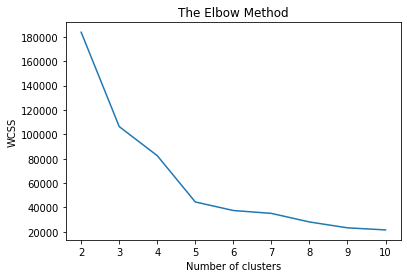

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


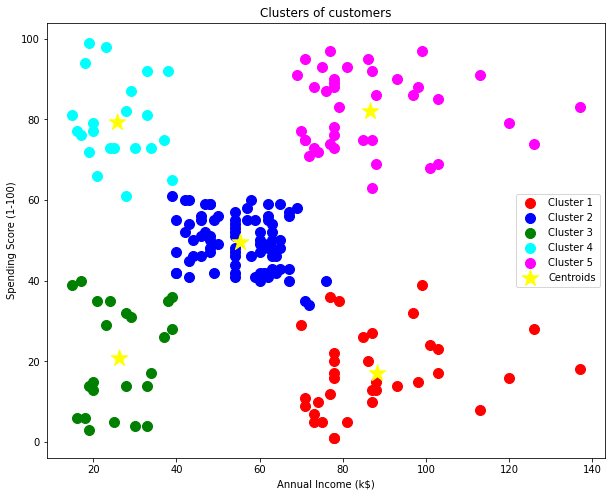

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt


# Create feature vector
assembler = VectorAssembler(inputCols=["Annual Income (k$)", "Spending Score (1-100)"], outputCol="features")
df_vector = assembler.transform(cluster_df).select("features")

# Elbow method to find optimal number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(k=i, seed=42)
    model = kmeans.fit(df_vector)
    wcss.append(model.summary.trainingCost)

# Plot elbow curve
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans model with 5 clusters
kmeans = KMeans(k=5, seed=42)
model = kmeans.fit(df_vector)

# Make predictions
predictions = model.transform(df_vector)

# Convert to Pandas for plotting
pandas_df = predictions.select("features", "prediction").toPandas()
X = pandas_df["features"].apply(lambda x: x.toArray()).tolist()
y_kmeans = pandas_df["prediction"].tolist()

# Plot the clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    cluster_points = [X[j] for j in range(len(X)) if y_kmeans[j] == i]
    if cluster_points:
        cluster_points = list(zip(*cluster_points))
        plt.scatter(cluster_points[0], cluster_points[1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
centroids = model.clusterCenters()
centroid_x = [float(center[0]) for center in centroids]
centroid_y = [float(center[1]) for center in centroids]
plt.scatter(centroid_x, centroid_y, s=300, c='yellow', marker='*', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **Ad Campaign Performance**

In [0]:
# Creating a Spark Dataframe using the Source Dataset
ads_df = (spark.read
                .format("csv")
                .option("header", "true")
                .option("inferSchema", "true")
                .load("dbfs:/FileStore/project/Ads_CTR_Optimisation.csv"))
display(ads_df)

Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0


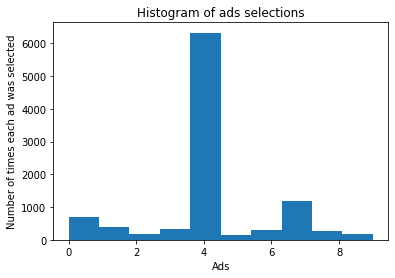

In [0]:
# UCB with 10,000 Rounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

pandas_df = ads_df.toPandas()
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = pandas_df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

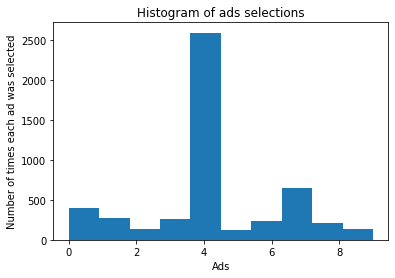

In [0]:
# UCB with 5000 Rounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

pandas_df = ads_df.toPandas()
N = 5000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = pandas_df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

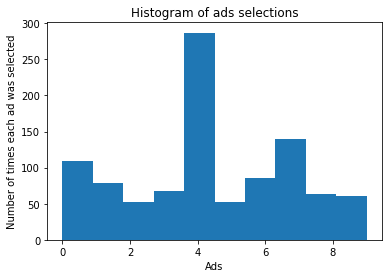

In [0]:
# UCB with 1000 Rounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

pandas_df = ads_df.toPandas()
N = 1000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = pandas_df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

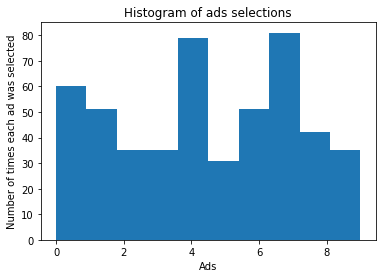

In [0]:
# UCB with 500 Rounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

pandas_df = ads_df.toPandas()
N = 500
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = pandas_df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


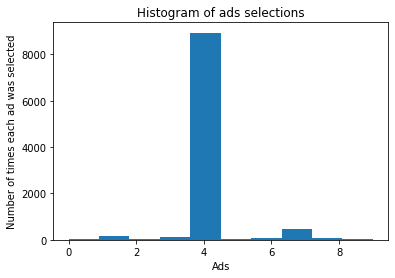

In [0]:
# Thoompson Sampling with 10,000 Rounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = pandas_df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

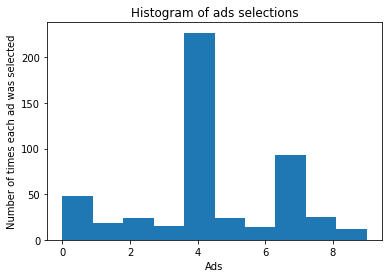

In [0]:
# Thoompson Sampling with 500 Rounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = pandas_df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
